# Дискретно-временные сигналы

Сигналы в общем случае классифицируются на **аналоговые** и **дискретные**.

Аналоговый сигнал будем обозначать как $x_a(t)$, где переменная $t$ может представлять любую физическую величину, однако мы будем считать, что она представляет **время**, измеряемое в секундах.

Дискретный сигнал будем обозначать как $x(n)$, где переменная $n$ принимает **целочисленные значения** и представляет **дискретные моменты времени**. Поэтому такой сигнал также называют **сигналом дискретного времени**, который является **числовой последовательностью** и может быть обозначен одним из следующих способов:

$$
x(n) = \{x(n)\} = \{\ldots, x(-1), x(0)\!\uparrow, x(1), \ldots\}
$$

где стрелка вверх указывает на отсчёт при $n = 0$.



## 2.1.1 ТИПЫ ПОСЛЕДОВАТЕЛЬНОСТЕЙ

В цифровой обработке сигналов для целей анализа используется несколько элементарных последовательностей. Ниже приводятся их определения и программные реализации.

### 1. Единичная импульсная последовательность

Единичная импульсная последовательность определяется следующим образом:

$$
\delta(n) =
\begin{cases}
1, & n = 0, \\
0, & n \neq 0
\end{cases}
=
\{\ldots, 0, 0, 1\!\uparrow, 0, 0, \ldots\}
$$

где стрелка вверх указывает на отсчёт при $n = 0$.

Для реализации единичной импульсной последовательности на конечном интервале можно использовать логическое условие $n = 0$, которое напрямую следует из её математического определения.

Например, сдвинутая единичная импульсная последовательность определяется как

$$
\delta(n - n_0) =
\begin{cases}
1, & n = n_0, \\
0, & n \neq n_0
\end{cases}
$$

и рассматривается на интервале $n_1 \le n \le n_2$.

``` python
import numpy as np
import matplotlib.pyplot as plt

def impseq(n0, n1, n2):
    """
    Генерирует x(n) = δ(n − n0) на интервале n1 ≤ n ≤ n2
    """
    n = np.arange(n1, n2 + 1)
    x = (n == n0).astype(int)
    return x, n

# параметры
n0 = 0
n1 = -10
n2 = 10

# генерация последовательности
x, n = impseq(n0, n1, n2)

# визуализация
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Единичная импульсная последовательность δ(n)')
plt.grid(True)
plt.show()
```

#### решение

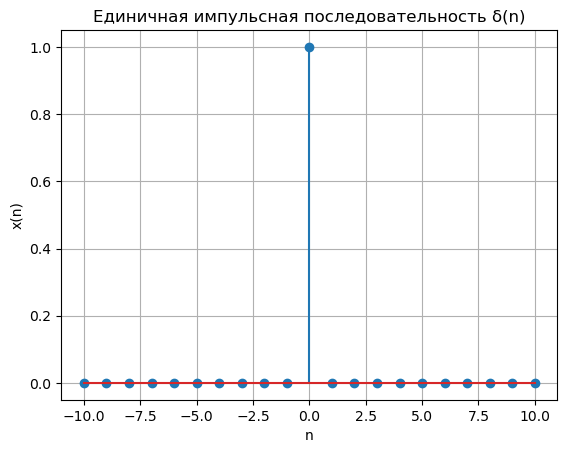

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def impseq(n0, n1, n2):
    """
    Генерирует x(n) = δ(n − n0) на интервале n1 ≤ n ≤ n2
    """
    n = np.arange(n1, n2 + 1)
    x = (n == n0).astype(int)
    return x, n

# параметры
n0 = 0
n1 = -10
n2 = 10

# генерация последовательности
x, n = impseq(n0, n1, n2)

# визуализация
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Единичная импульсная последовательность δ(n)')
plt.grid(True)
plt.show()

### 2. Единичная ступенчатая последовательность

Единичная ступенчатая последовательность определяется следующим образом:

$$
u(n) =
\begin{cases}
1, & n \ge 0, \\
0, & n < 0
\end{cases}
=
\{\ldots, 0, 0, 1\!\uparrow, 1, 1, 1, \ldots\}
$$

где стрелка вверх указывает на отсчёт при $n = 0$.

Для формирования единичной ступенчатой последовательности на конечном интервале можно использовать логическое условие $n \ge 0$, которое напрямую следует из её математического определения.

Сдвинутая единичная ступенчатая последовательность задаётся выражением

$$
u(n - n_0) =
\begin{cases}
1, & n \ge n_0, \\
0, & n < n_0
\end{cases}
$$

и рассматривается на интервале $n_1 \le n \le n_2$.

``` python
import numpy as np

def stepseq(n0, n1, n2):
    """
    Генерирует x(n) = u(n − n0) на интервале n1 ≤ n ≤ n2
    """
    n = np.arange(n1, n2 + 1)
    x = (n >= n0).astype(int)
    return x, n
```

#### решение

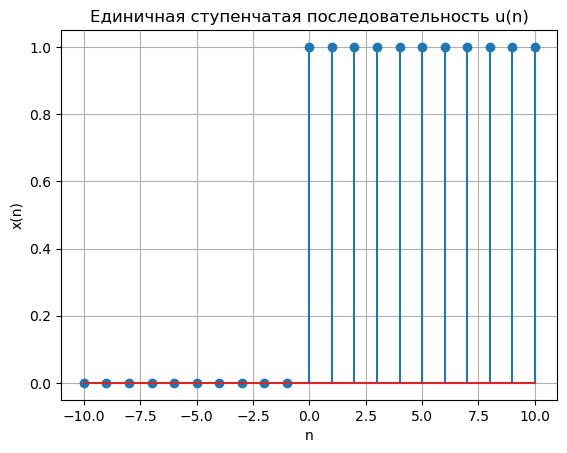

In [8]:
import numpy as np

def stepseq(n0, n1, n2):
    """
    Генерирует x(n) = u(n − n0) на интервале n1 ≤ n ≤ n2
    """
    n = np.arange(n1, n2 + 1)
    x = (n >= n0).astype(int)
    return x, n

# параметры
n0 = 0
n1 = -10
n2 = 10

# генерация последовательности
x, n = stepseq(n0, n1, n2)

# визуализация
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Единичная ступенчатая последовательность u(n)')
plt.grid(True)
plt.show()

## 2.1.2 ОПЕРАЦИИ НАД ПОСЛЕДОВАТЕЛЬНОСТЯМИ

В этом разделе кратко описываются основные операции над последовательностями и их программная реализация.

### 1. Сложение сигналов

Сложение сигналов выполняется **поэлементно** и определяется выражением

$$
\{x_1(n)\} + \{x_2(n)\} = \{x_1(n) + x_2(n)\}.
$$

Для корректного выполнения сложения обе последовательности должны быть заданы на **одном и том же множестве отсчётов** $n$.

Если последовательности имеют разную длину или определены на различных интервалах времени, их необходимо предварительно привести к **общему вектору индексов**, дополнив отсутствующие значения нулями.

Пусть последовательности $x_1(n)$ и $x_2(n)$ заданы на интервалах $n_1$ и $n_2$ соответственно. Тогда результирующая последовательность $y(n)$ определяется на интервале

$$
n = [\min(n_1, n_2),\; \max(n_1, n_2)],
$$

при этом значения сигналов вне области их определения считаются равными нулю.

``` python
def sigadd(x1, n1, x2, n2):
    """
    Реализует y(n) = x1(n) + x2(n)
    для последовательностей, заданных на разных интервалах времени
    """
    n_start = min(n1[0], n2[0])
    n_end = max(n1[-1], n2[-1])
    n = np.arange(n_start, n_end + 1)

    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))

    y1[(n >= n1[0]) & (n <= n1[-1])] = x1
    y2[(n >= n2[0]) & (n <= n2[-1])] = x2

    y = y1 + y2
    return y, n
```

#### решение

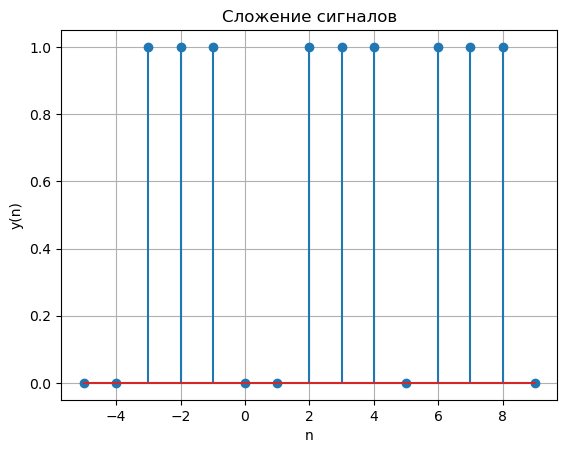

In [20]:
def sigadd(x1, n1, x2, n2):
    """
    Реализует y(n) = x1(n) + x2(n)
    для последовательностей, заданных на разных интервалах времени
    """
    n_start = min(n1[0], n2[0])
    n_end = max(n1[-1], n2[-1])
    n = np.arange(n_start, n_end + 1)

    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))

    y1[(n >= n1[0]) & (n <= n1[-1])] = x1
    y2[(n >= n2[0]) & (n <= n2[-1])] = x2

    y = y1 + y2
    return y, n


# параметры
n1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n2 = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
x1 = [0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
x2 = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1]

# генерация последовательности
y, n = sigadd(x1, n1, x2, n2)

# визуализация
plt.figure()
plt.stem(n, y)
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Сложение сигналов')
plt.grid(True)
plt.show()

### 2. Умножение сигналов

Умножение сигналов выполняется **поэлементно** (или *поточечно*, *dot-multiplication*) и определяется выражением

$$
\{x_1(n)\} \cdot \{x_2(n)\} = \{x_1(n)\,x_2(n)\}.
$$

Для выполнения операции умножения действуют те же ограничения, что и для операции сложения: обе последовательности должны быть определены на одном и том же множестве отсчётов $n$.

Если последовательности имеют разную длину или заданы на разных интервалах времени, их необходимо предварительно привести к общему вектору индексов, дополнив отсутствующие значения нулями.

Пусть последовательности $x_1(n)$ и $x_2(n)$ заданы на интервалах $n_1$ и $n_2$ соответственно. Тогда результирующая последовательность $y(n)$ определяется на интервале

$$
n = [\min(n_1, n_2),\; \max(n_1, n_2)],
$$

а значения сигналов вне их области определения считаются равными нулю.

``` python
def sigmult(x1, n1, x2, n2):
    """
    Реализует y(n) = x1(n) * x2(n)
    для последовательностей, заданных на разных интервалах времени
    """
    n_start = min(n1[0], n2[0])
    n_end = max(n1[-1], n2[-1])
    n = np.arange(n_start, n_end + 1)

    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))

    y1[(n >= n1[0]) & (n <= n1[-1])] = x1
    y2[(n >= n2[0]) & (n <= n2[-1])] = x2

    y = y1 * y2
    return y, n
```

#### решение

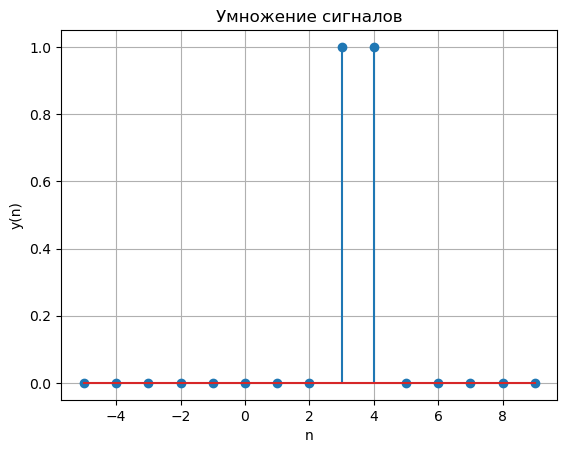

In [26]:
def sigmult(x1, n1, x2, n2):
    """
    Реализует y(n) = x1(n) * x2(n)
    для последовательностей, заданных на разных интервалах времени
    """
    n_start = min(n1[0], n2[0])
    n_end = max(n1[-1], n2[-1])
    n = np.arange(n_start, n_end + 1)

    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))

    y1[(n >= n1[0]) & (n <= n1[-1])] = x1
    y2[(n >= n2[0]) & (n <= n2[-1])] = x2

    y = y1 * y2
    return y, n


# параметры
n1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n2 = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
x1 = [0, 0, 0, 1, 1, 0, 1, 1, 1, 0]
x2 = [0, 0, 1, 1, 1, 0, 0, 1, 1, 1]

# генерация последовательности
y, n = sigmult(x1, n1, x2, n2)

# визуализация
plt.figure()
plt.stem(n, y)
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Умножение сигналов')
plt.grid(True)
plt.show()

### 3. Масштабирование

Операция масштабирования заключается в умножении каждого отсчёта последовательности на скаляр $\alpha$ и определяется выражением

$$
\alpha \{x(n)\} = \{\alpha x(n)\}.
$$

### 4. Временной сдвиг

Операция временного сдвига заключается в смещении каждого отсчёта последовательности $x(n)$ на величину $k$ и приводит к формированию сдвинутой последовательности $y(n)$:

$$
y(n) = \{x(n - k)\}.
$$

Если ввести замену переменной $m = n - k$, то $n = m + k$, и операция может быть записана в виде

$$
y(m + k) = \{x(m)\}.
$$

Таким образом, временной сдвиг не изменяет значения отсчётов последовательности, а лишь изменяет соответствующий вектор индексов, увеличивая каждый его элемент на величину $k$.

``` python
def sigshift(x, n, k):
    """
    Реализует y(n) = x(n − k)
    """
    y = x.copy()
    n_shifted = n + k
    return y, n_shifted
```


#### решение

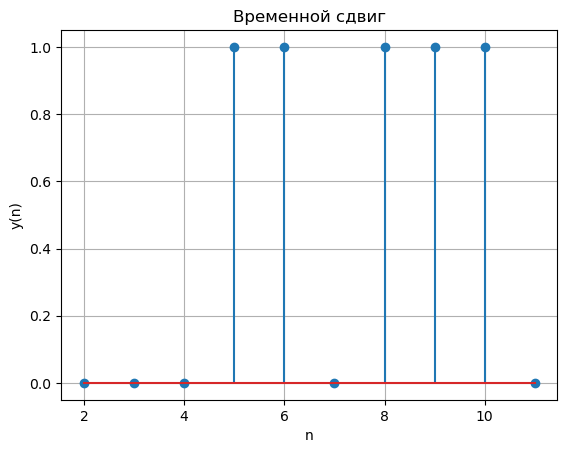

In [30]:
def sigshift(x, n, k):
    """
    Реализует y(n) = x(n − k)
    """
    y = x.copy()
    n_shifted = n + k
    return y, n_shifted


# параметры
n = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x = [0, 0, 0, 1, 1, 0, 1, 1, 1, 0]
k = 2
# генерация последовательности
y, n = sigshift(x, n, k)

# визуализация
plt.figure()
plt.stem(n, y)
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Временной сдвиг')
plt.grid(True)
plt.show()

### 5. Отражение по времени (folding)

Операция отражения по времени заключается в замене $n$ на $-n$ и приводит к формированию отражённой последовательности:

$$
y(n) = \{x(-n)\}.
$$

``` python
def sigfold(x, n):
    """
    Реализует y(n) = x(−n)
    """
    y = x[::-1]
    n_folded = -n[::-1]
    return y, n_folded
```

#### решение

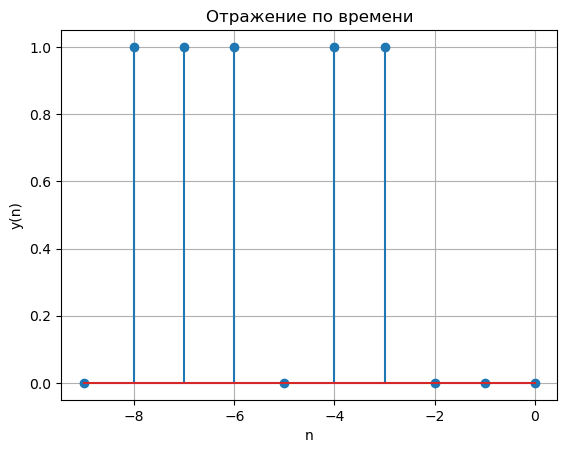

In [31]:
def sigfold(x, n):
    """
    Реализует y(n) = x(−n)
    """
    y = x[::-1]
    n_folded = -n[::-1]
    return y, n_folded


# параметры
n = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x = [0, 0, 0, 1, 1, 0, 1, 1, 1, 0]
# генерация последовательности
y, n = sigfold(x, n)

# визуализация
plt.figure()
plt.stem(n, y)
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Отражение по времени')
plt.grid(True)
plt.show()

### 6. Суммирование отсчётов

Операция суммирования отсчётов отличается от операции сложения сигналов. Она заключается в суммировании всех значений последовательности $x(n)$ на интервале от $n_1$ до $n_2$:

$$
\sum_{n=n_1}^{n_2} x(n) = x(n_1) + \cdots + x(n_2).
$$

``` python
def samplesum(x, n, n1, n2):
    """
    Суммирует значения x(n) на интервале n1 ≤ n ≤ n2
    """
    return np.sum(x[(n >= n1) & (n <= n2)])
```

### 7. Произведение отсчётов

Операция произведения отсчётов также отличается от поэлементного умножения сигналов. Она заключается в перемножении всех значений последовательности $x(n)$ на интервале от $n_1$ до $n_2$:

$$
\prod_{n=n_1}^{n_2} x(n) = x(n_1) \times \cdots \times x(n_2).
$$

``` python
def sampleprod(x, n, n1, n2):
    """
    Перемножает значения x(n) на интервале n1 ≤ n ≤ n2
    """
    return np.prod(x[(n >= n1) & (n <= n2)])
```

In [37]:
def samplesum(x, n, n1, n2):
    """
    Суммирует значения x(n) на интервале n1 ≤ n ≤ n2
    """
    return np.sum(x[(n >= n1) & (n <= n2)])


def sampleprod(x, n, n1, n2):
    """
    Перемножает значения x(n) на интервале n1 ≤ n ≤ n2
    """
    return np.prod(x[(n >= n1) & (n <= n2)])


# параметры
n = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n1 = 2
n2 = 5
x = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
# генерация последовательности
summ = samplesum(x, n, n1, n2)

# визуализация
print(summ)

4


### 8. Энергия сигнала

Энергия дискретной последовательности $x(n)$ определяется выражением

$$
E_x = \sum_{n=-\infty}^{\infty} x(n)x^*(n)
    = \sum_{n=-\infty}^{\infty} |x(n)|^2,
$$

где верхний индекс $^*$ обозначает операцию комплексного сопряжения.

Для последовательности конечной длительности энергия может быть вычислена прямым суммированием квадратов модулей её отсчётов.

``` python
def signal_energy(x):
    """
    Вычисляет энергию дискретного сигнала
    """
    return np.sum(np.abs(x) ** 2)
```


### 9. Мощность сигнала

Средняя мощность периодической дискретной последовательности $\tilde{x}(n)$
с фундаментальным периодом $N$ определяется выражением

$$
P_x = \frac{1}{N} \sum_{n=0}^{N-1} |\tilde{x}(n)|^2.
$$

``` python
def signal_power(x_period):
    """
    Вычисляет среднюю мощность периодического сигнала
    """
    N = len(x_period)
    return np.sum(np.abs(x_period) ** 2) / N
```

## 2.1.3. Упражнения

Сгенерировать и построить графики следующих дискретных последовательностей на указанных интервалах.

### Упражнение (a)

Сгенерировать и построить последовательность

$$
x(n) = 2\delta(n+2) - \delta(n-4), \quad -5 \le n \le 5.
$$

#### решение

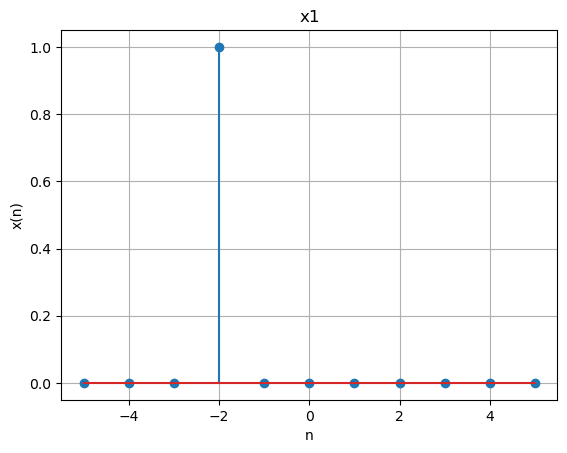

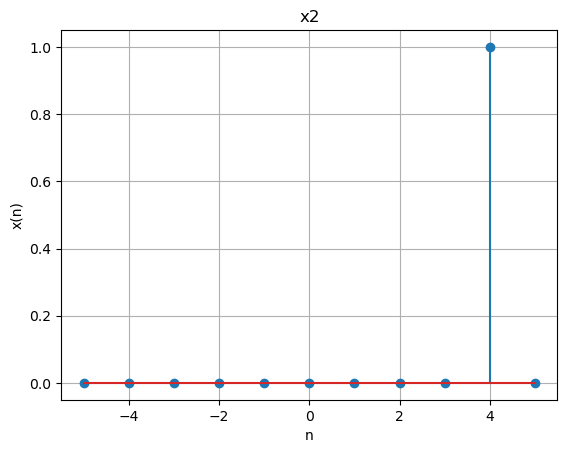

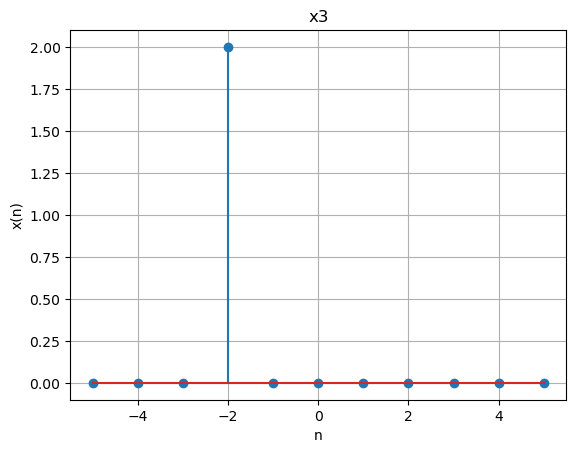

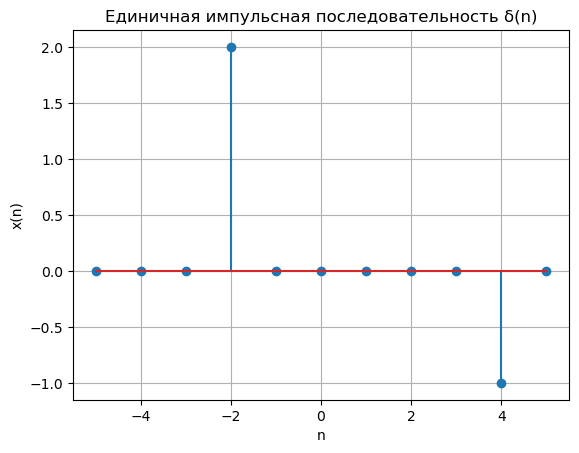

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def impseq(n0, n1, n2):
    """
    Генерирует x(n) = δ(n − n0) на интервале n1 ≤ n ≤ n2
    """
    n = np.arange(n1, n2 + 1)
    x = (n == n0).astype(int)
    return x, n

# параметры
n1 = -5
n2 = 5

# генерация последовательности
x1, n = impseq(-2, n1, n2)
x2, n = impseq(4, n1, n2)
x3 = x1 * 2
x = x3 - x2

# визуализация
plt.figure()
plt.stem(n, x1)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('x1')
plt.grid(True)
plt.show()

# визуализация
plt.figure()
plt.stem(n, x2)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('x2')
plt.grid(True)
plt.show()

# визуализация
plt.figure()
plt.stem(n, x3)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('x3')
plt.grid(True)
plt.show()

# визуализация
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Единичная импульсная последовательность δ(n)')
plt.grid(True)
plt.show()

### Упражнение (b)

Сгенерировать и построить последовательность

$$
x(n) = n\,[u(n) - u(n-10)]
      + 10e^{-0.3(n-10)}[u(n-10) - u(n-20)],
\quad 0 \le n \le 20.
$$

#### решение

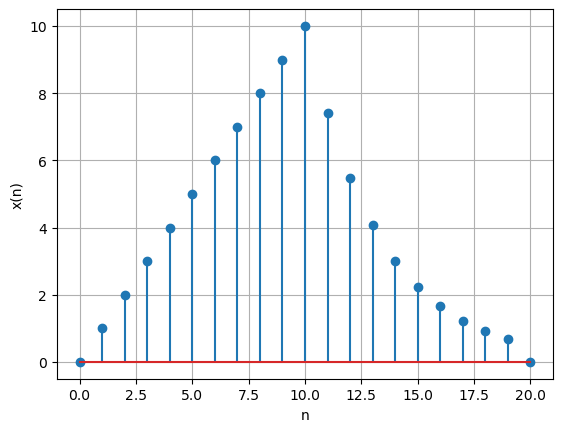

In [53]:
import numpy as np

def stepseq(n0, n1, n2):
    """
    Генерирует x(n) = u(n − n0) на интервале n1 ≤ n ≤ n2
    """
    n = np.arange(n1, n2 + 1)
    x = (n >= n0).astype(int)
    return x, n


def sigmult(x1, n1, x2, n2):
    """
    Реализует y(n) = x1(n) * x2(n)
    для последовательностей, заданных на разных интервалах времени
    """
    n_start = min(n1[0], n2[0])
    n_end = max(n1[-1], n2[-1])
    n = np.arange(n_start, n_end + 1)

    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))

    y1[(n >= n1[0]) & (n <= n1[-1])] = x1
    y2[(n >= n2[0]) & (n <= n2[-1])] = x2

    y = y1 * y2
    return y, n

# параметры
n1 = 0
n2 = 20
n = np.arange(0, 21)

u1, n = stepseq(0, n1, n2)
u2, n = stepseq(10, n1, n2)
u3diff = u1 - u2
n1mult, n = sigmult(n, n, u3diff, n)

u3, n = stepseq(20, n1, n2)
u3diff2 = u2 - u3
exp = np.exp(-0.3*(n-10))
n2mult, n = sigmult(10*exp, n, u3diff2, n)

# генерация последовательности
x = n1mult + n2mult

# визуализация
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid(True)
plt.show()

### Упражнение (c)

Сгенерировать и построить последовательность

$$
x(n) = \cos(0.04\pi n) + 0.2\,w(n), \quad 0 \le n \le 50,
$$

где $w(n)$ — гауссовская случайная последовательность с нулевым средним
и единичной дисперсией.

``` python
np.random.seed(0)  # для воспроизводимости

n = np.arange(0, 51)
w = np.random.normal(0, 1, len(n))
```

#### решение

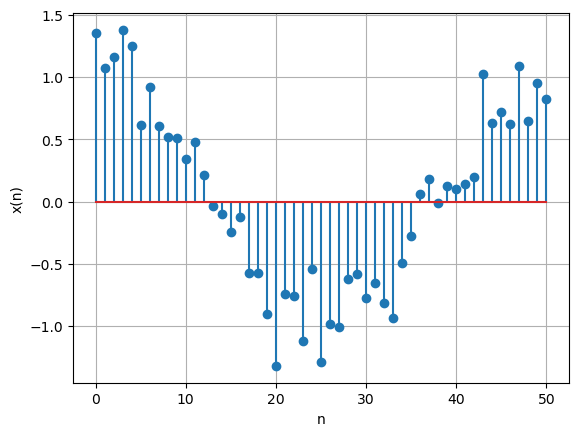

In [54]:
np.random.seed(0)  # для воспроизводимости

n = np.arange(0, 51)
w = np.random.normal(0, 1, len(n))

x = np.cos(0.04*np.pi*n)+0.2*w

# визуализация
plt.figure()
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid(True)
plt.show()

## 2.1.4 Некоторые полезные результаты

В теории дискретно-временных сигналов существует несколько важных результатов. Мы обсудим некоторые из них, которые полезны в цифровой обработке сигналов.

### Синтез единичными отсчётами

Любая произвольная последовательность $x(n)$ может быть представлена как взвешенная сумма сдвинутых и масштабированных единичных отсчётов следующим образом:

$$
x(n) = \sum_{k=-\infty}^{\infty} x(k)\,\delta(n-k) \tag{2.3}
$$


Мы будем использовать этот результат в следующем разделе.

---

### Чётно-нечётный синтез

Вещественная последовательность $x_e(n)$ называется **чётной** (симметричной), если

$$
x_e(-n) = x_e(n)
$$

Аналогично, вещественная последовательность $x_o(n)$ называется **нечётной** (антисимметричной), если

$$
x_o(-n) = -x_o(n)
$$

Тогда любая произвольная вещественная последовательность $x(n)$ может быть разложена на чётную и нечётную составляющие:

$$
x(n) = x_e(n) + x_o(n) \tag{2.4}
$$



где чётная и нечётная части задаются выражениями

$$
x_e(n) = \frac{1}{2}\,[x(n) + x(-n)],
\qquad
x_o(n) = \frac{1}{2}\,[x(n) - x(-n)]  \tag{2.5}
$$



Соответственно, мы будем использовать это разложение при изучении свойств преобразования Фурье. Поэтому полезным упражнением является разработка простой функции на Python, которая разлагает заданную последовательность на чётную и нечётную части. Используя операции Python (NumPy), рассмотренные ранее, можно получить следующую функцию `evenodd`:

``` python
import numpy as np

def evenodd(x, n):
    """
    Разложение вещественного сигнала на чётную и нечётную части.

    Параметры
    ----------
    x : array_like
        Вещественные значения сигнала
    n : array_like
        Индексы отсчётов

    Возвращает
    ----------
    xe : ndarray
        Чётная часть сигнала
    xo : ndarray
        Нечётная часть сигнала
    m : ndarray
        Общая ось индексов
    """
    x = np.asarray(x)
    n = np.asarray(n)

    if np.any(np.imag(x) != 0):
        raise ValueError("x is not a real sequence")

    m = -n[::-1]
    m1 = min(m.min(), n.min())
    m2 = max(m.max(), n.max())
    m = np.arange(m1, m2 + 1)

    x_ext = np.zeros(len(m))
    idx = n - m[0]
    x_ext[idx] = x

    x_flip = x_ext[::-1]

    xe = 0.5 * (x_ext + x_flip)
    xo = 0.5 * (x_ext - x_flip)

    return xe, xo, m
```


Пусть $x(n) = u(n) - u(n-10)$. Разложить $x(n)$ на чётную и нечётную составляющие.

Последовательность $x(n)$, которая отлична от нуля на интервале $0 \le n \le 9$, называется **прямоугольным импульсом** (*rectangular pulse*). Мы будем использовать Python (NumPy и Matplotlib), чтобы определить и построить её чётную и нечётную части.

---

Формирование сигнала

$$
x(n) = u(n) - u(n-10)
$$

---


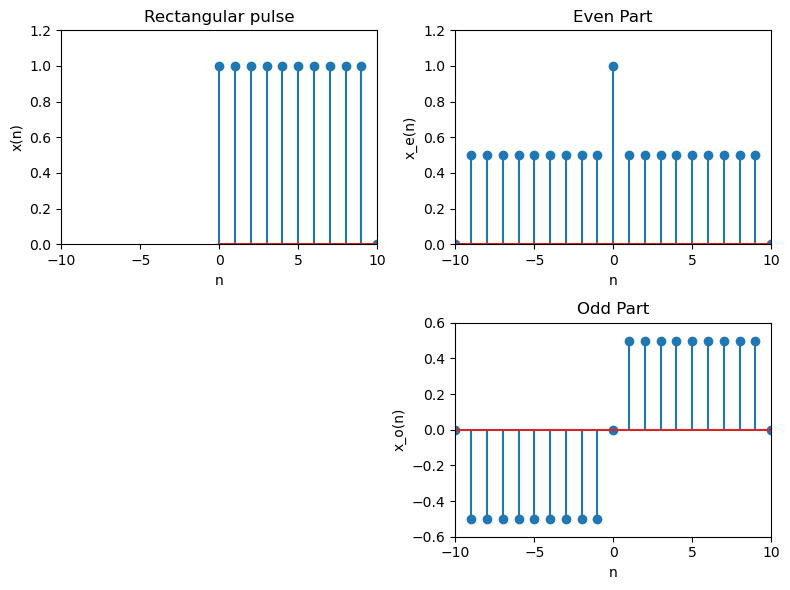

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# формирование прямоугольного импульса
n1 = 0
n2 = 10
x1, n = stepseq(0, 0, 10)
x2, _ = stepseq(10, 0, 10)
x = x1 - x2

# разложение на чётную и нечётную части
xe, xo, m = evenodd(x, n)

# построение графиков
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.stem(n, x)
plt.title("Rectangular pulse")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.axis([-10, 10, 0, 1.2])

plt.subplot(2, 2, 2)
plt.stem(m, xe)
plt.title("Even Part")
plt.xlabel("n")
plt.ylabel("x_e(n)")
plt.axis([-10, 10, 0, 1.2])

plt.subplot(2, 2, 4)
plt.stem(m, xo)
plt.title("Odd Part")
plt.xlabel("n")
plt.ylabel("x_o(n)")
plt.axis([-10, 10, -0.6, 0.6])

plt.tight_layout()
plt.show()

### Задание 1. Импульсные последовательности

Сформировать дискретную последовательность

$$
x(n) = 3\delta(n - 1) - 2\delta(n + 3),
$$

на интервале $-6 \le n \le 6$.

1. Записать аналитическое выражение для $x(n)$.
2. Определить значения $x(n)$ для всех $n$ на заданном интервале.
3. Построить график последовательности.

### Задание 2. Кусочно-заданная последовательность

Сформировать последовательность

$$
x(n) =
\begin{cases}
n, & 0 \le n < 8, \\
8e^{-0.2(n-8)}, & 8 \le n < 16, \\
0, & \text{иначе}.
\end{cases}
$$

1. Переписать последовательность с использованием единичной ступенчатой функции $u(n)$.
2. Указать область определения последовательности.
3. Построить график $x(n)$.

### Задание 3. Шумовой сигнал

Сформировать последовательность

$$
x(n) = \sin(0.1\pi n) + 0.3\,w(n), \quad 0 \le n \le 40,
$$

где $w(n)$ — гауссовская случайная последовательность с нулевым средним
и единичной дисперсией.

1. Построить график сигнала.
2. Определить выборочное среднее и дисперсию полученной последовательности.
3. Объяснить влияние шума на форму сигнала.

### Задание 4. Операции над последовательностями

Пусть заданы две последовательности:

$$
x_1(n) = u(n) - u(n - 5), \qquad
x_2(n) = \delta(n - 2).
$$

1. Найти аналитическое выражение для $y(n) = x_1(n) + x_2(n)$.
2. Найти аналитическое выражение для $z(n) = x_1(n)\,x_2(n)$.
3. Построить графики всех полученных последовательностей.

### Задание 5. Временные преобразования

Для последовательности $x(n)$, заданной на интервале $-5 \le n \le 5$:

1. Построить отражённую последовательность $x(-n)$.
2. Построить сдвинутую последовательность $x(n - 3)$.
3. Построить масштабированную по амплитуде последовательность $2x(n)$.
4. Сравнить все полученные графики и сделать выводы.

